In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "sicilia"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,19,Sicilia,1,0,1,2,3,3,3,...,0.0,0.0,0.0,2.0,0.00,33.33,0.00,0.00,0.00,0.00
1,2020-02-26T18:00:00,19,Sicilia,1,0,1,2,3,0,0,...,0.0,0.0,0.0,0.0,0.00,33.33,0.00,0.00,0.00,0.00
2,2020-02-27T18:00:00,19,Sicilia,1,0,1,1,2,-1,1,...,0.0,0.0,0.0,-1.0,0.00,50.00,0.00,0.00,0.00,-33.33
3,2020-02-28T18:00:00,19,Sicilia,1,0,1,1,2,0,0,...,0.0,0.0,0.0,0.0,0.00,50.00,0.00,0.00,0.00,0.00
4,2020-02-29T17:00:00,19,Sicilia,1,0,1,1,2,0,0,...,0.0,1.0,0.0,0.0,0.00,50.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,2020-12-27T17:00:00,19,Sicilia,1027,174,1201,31966,33167,-123,682,...,15.0,5630.0,3444.0,-140.0,14.49,3.62,12.11,19.80,2.35,-0.37
307,2020-12-28T17:00:00,19,Sicilia,1064,175,1239,32007,33246,79,650,...,28.0,5693.0,3713.0,41.0,14.12,3.73,11.42,17.51,0.57,0.24
308,2020-12-29T17:00:00,19,Sicilia,1093,169,1262,32147,33409,163,995,...,26.0,8807.0,5164.0,140.0,13.39,3.78,11.30,19.27,-3.43,0.49
309,2020-12-30T17:00:00,19,Sicilia,1085,166,1251,32136,33387,-22,1084,...,29.0,8497.0,5298.0,-11.0,13.27,3.75,12.76,20.46,-1.78,-0.07


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 12, 31, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 1299
Nuovi tamponi: 7308.0
Percentuale nuovi positivi/nuovi tamponi: 17.8 %
Nuovi guariti: 787.0
Nuovi deceduti: 31.0
Variazione positivi ricoverati con sintomi: -16.0
Variazione positivi in terapia intensiva: 5.0
Variazione positivi in isolamento dimiciliare: 492.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 12, 31, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-01T17:00:00,19,Sicilia,999,132,1131,14193,15324,882,1095,...,16.0,8547.0,5190.0,835.0,11.67,7.38,12.81,21.10,8.20,6.11
1,2020-11-02T17:00:00,19,Sicilia,1025,142,1167,14897,16064,740,1024,...,18.0,8034.0,4790.0,704.0,12.17,7.26,12.75,21.38,7.58,4.83
2,2020-11-03T17:00:00,19,Sicilia,1072,150,1222,15584,16806,742,1048,...,14.0,8015.0,4356.0,687.0,12.27,7.27,13.08,24.06,5.63,4.62
3,2020-11-04T17:00:00,19,Sicilia,1105,148,1253,16365,17618,812,1155,...,19.0,9376.0,6392.0,781.0,11.81,7.11,12.32,18.07,-1.33,4.83
4,2020-11-05T17:00:00,19,Sicilia,1147,157,1304,17222,18526,908,1322,...,25.0,9497.0,5691.0,857.0,12.04,7.04,13.92,23.23,6.08,5.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2020-12-27T17:00:00,19,Sicilia,1027,174,1201,31966,33167,-123,682,...,15.0,5630.0,3444.0,-140.0,14.49,3.62,12.11,19.80,2.35,-0.37
57,2020-12-28T17:00:00,19,Sicilia,1064,175,1239,32007,33246,79,650,...,28.0,5693.0,3713.0,41.0,14.12,3.73,11.42,17.51,0.57,0.24
58,2020-12-29T17:00:00,19,Sicilia,1093,169,1262,32147,33409,163,995,...,26.0,8807.0,5164.0,140.0,13.39,3.78,11.30,19.27,-3.43,0.49
59,2020-12-30T17:00:00,19,Sicilia,1085,166,1251,32136,33387,-22,1084,...,29.0,8497.0,5298.0,-11.0,13.27,3.75,12.76,20.46,-1.78,-0.07


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

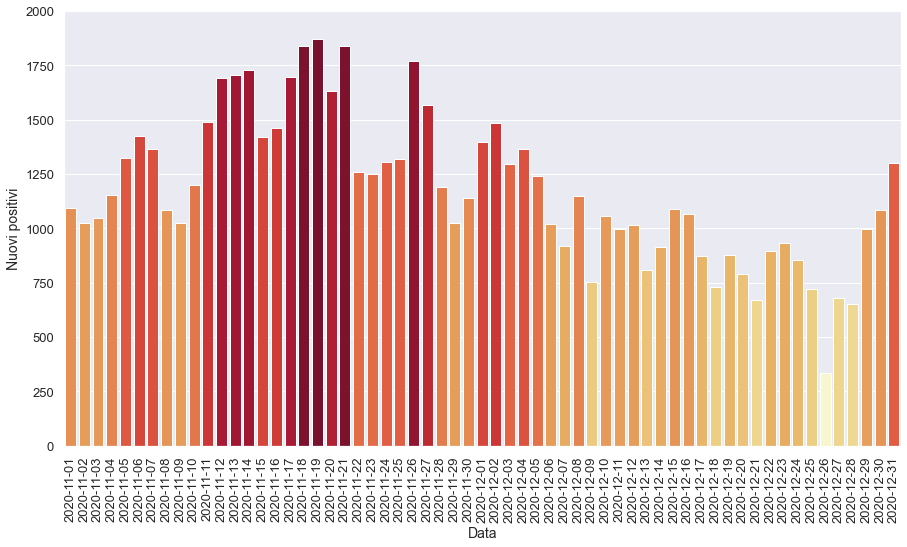

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

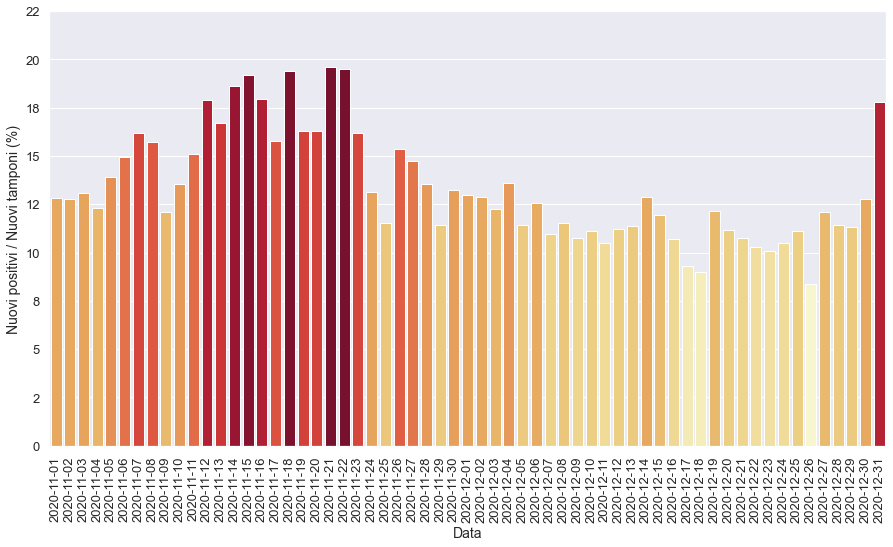

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

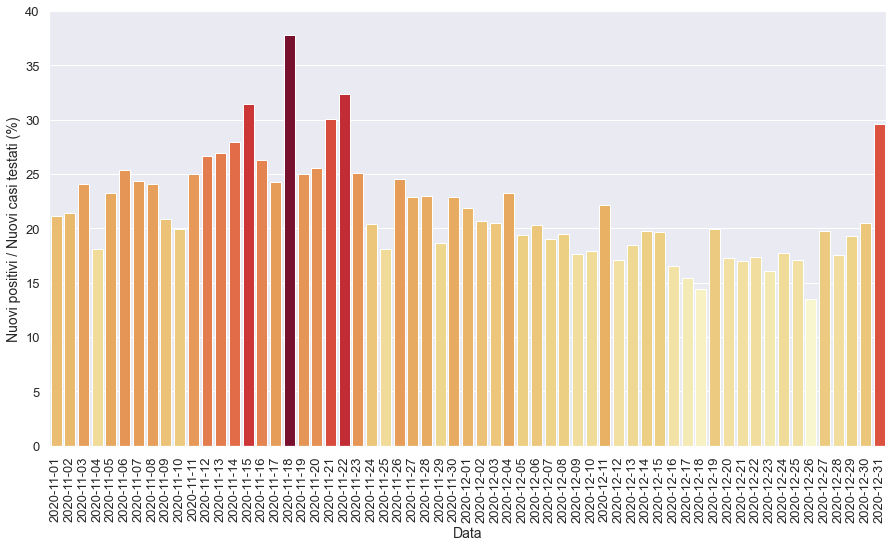

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

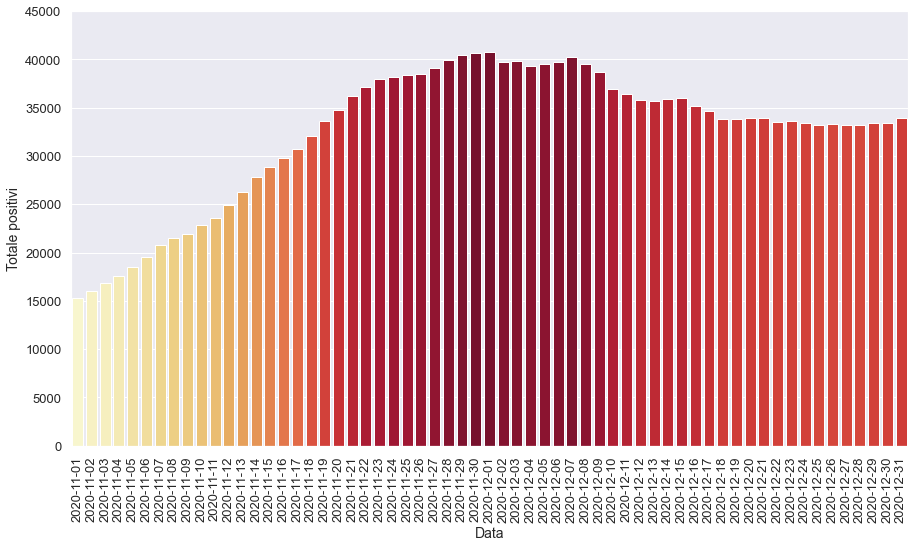

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

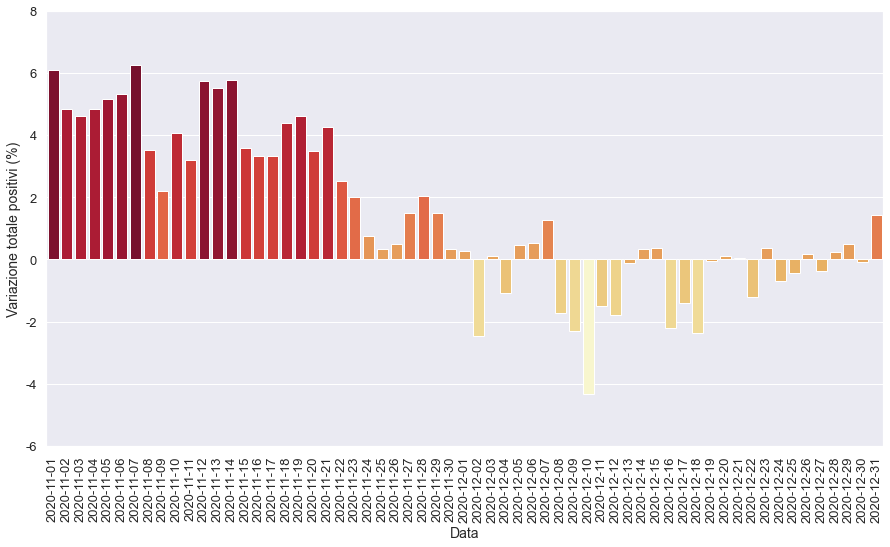

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

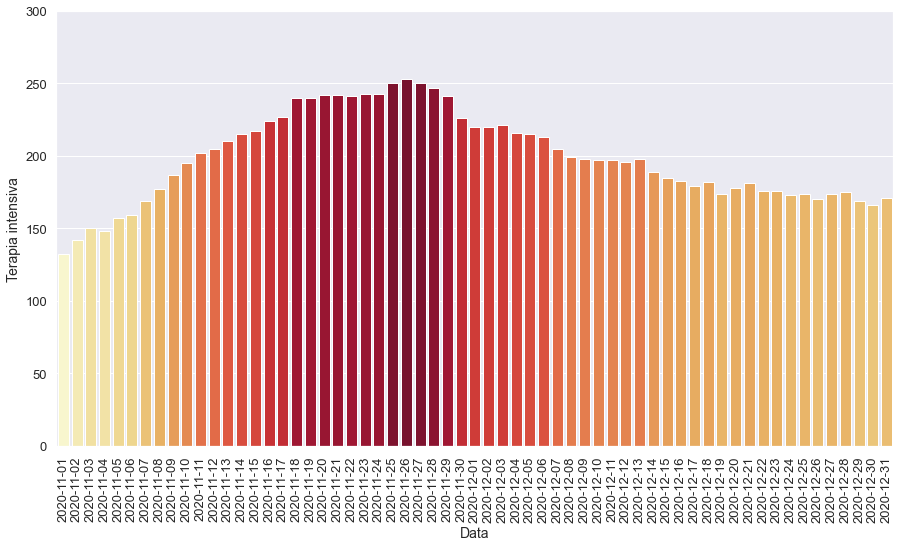

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

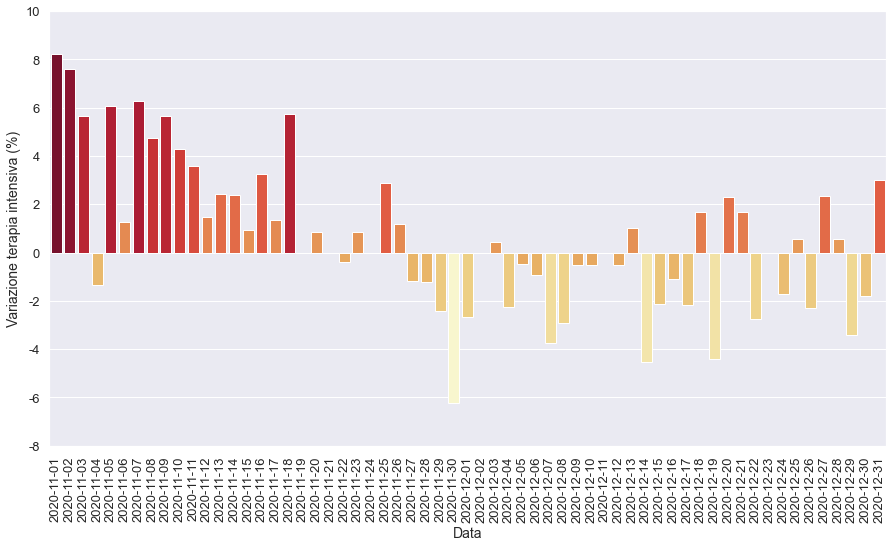

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

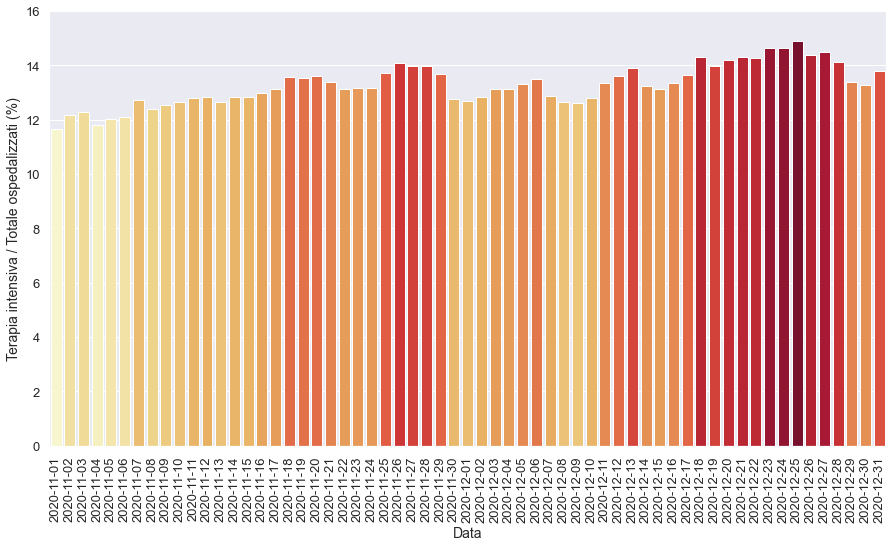

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

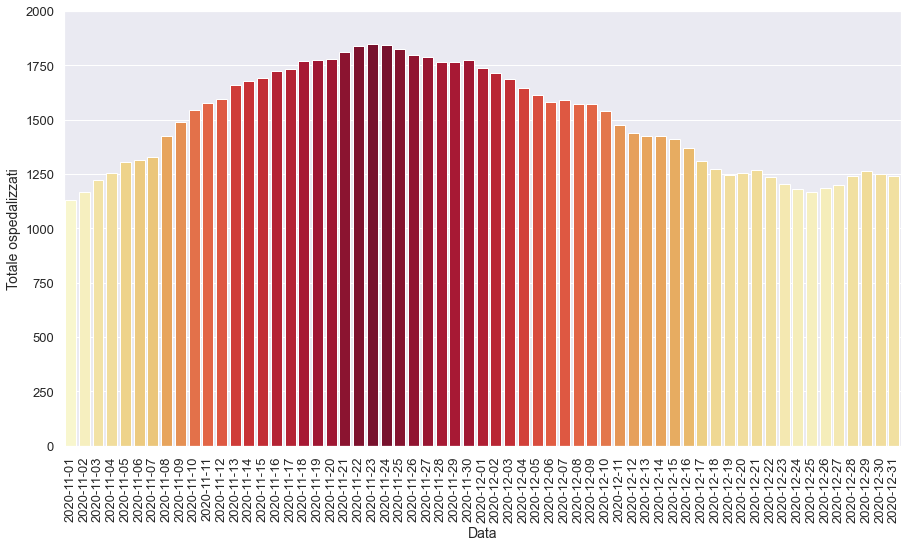

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

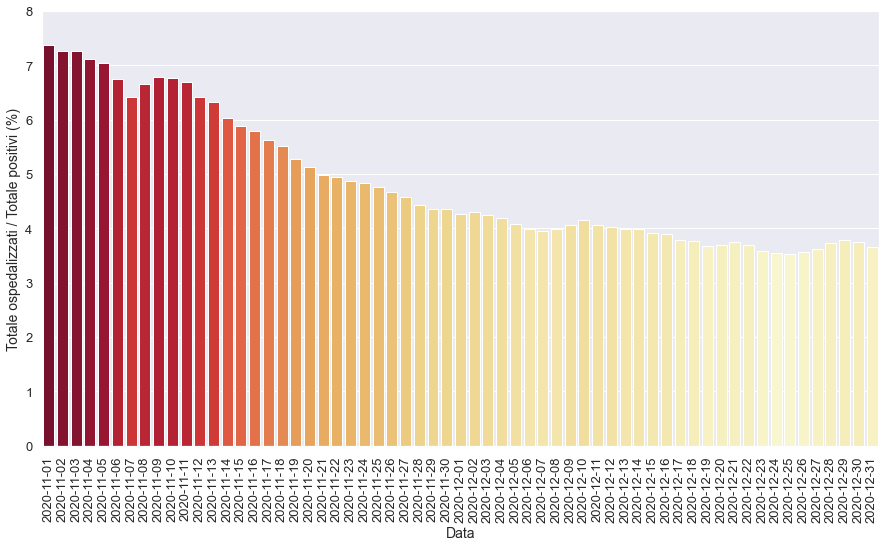

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

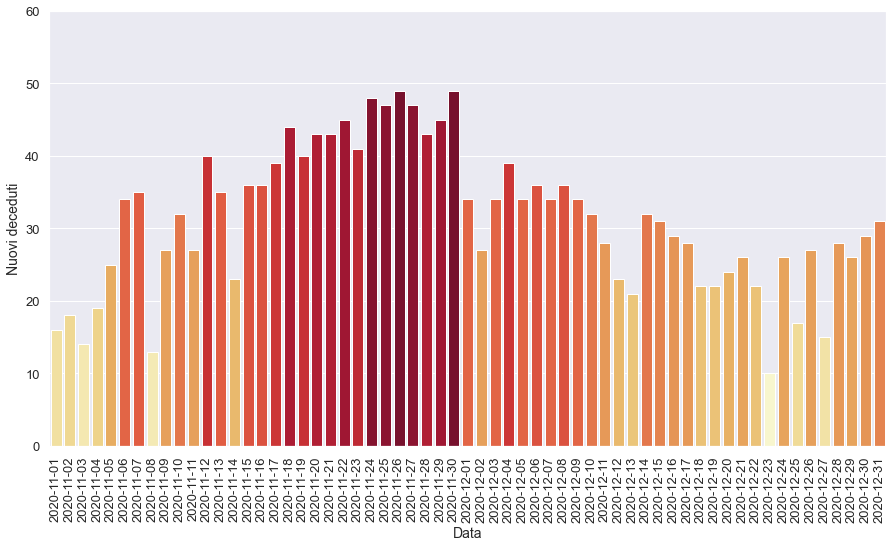

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

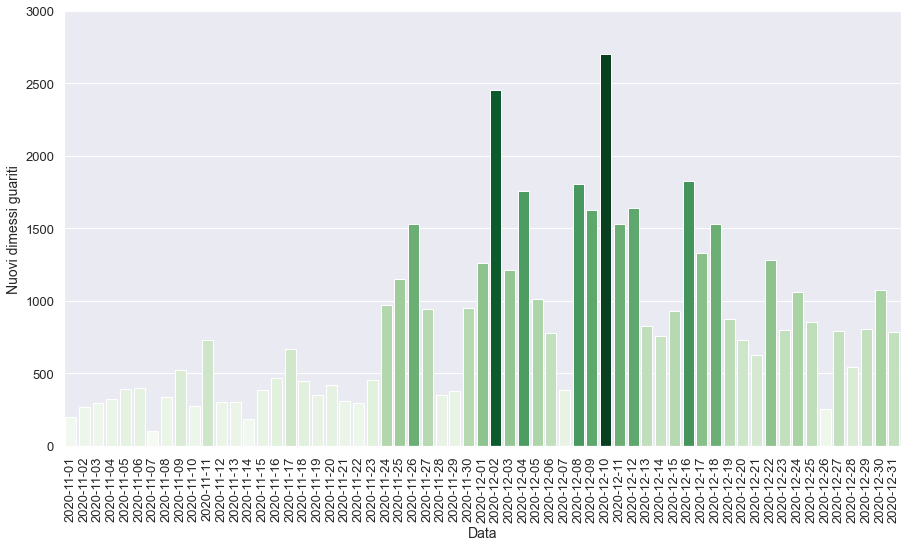

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-12-01T17:00:00,19,Sicilia,1517,220,1737,38993,40730,106,1399,...,34.0,10773.0,6386.0,142.0,12.67,4.26,12.99,21.91,-2.65,0.26
1,2020-12-02T17:00:00,19,Sicilia,1494,220,1714,38017,39731,-999,1483,...,27.0,11536.0,7171.0,-976.0,12.84,4.31,12.86,20.68,0.00,-2.45
2,2020-12-03T17:00:00,19,Sicilia,1465,221,1686,38094,39780,49,1294,...,34.0,10581.0,6329.0,77.0,13.11,4.24,12.23,20.45,0.45,0.12
3,2020-12-04T17:00:00,19,Sicilia,1431,216,1647,37703,39350,-430,1365,...,39.0,10026.0,5870.0,-391.0,13.11,4.19,13.61,23.25,-2.26,-1.08
4,2020-12-05T17:00:00,19,Sicilia,1400,215,1615,37925,39540,190,1240,...,34.0,10875.0,6398.0,222.0,13.31,4.08,11.40,19.38,-0.46,0.48
5,2020-12-06T17:00:00,19,Sicilia,1367,213,1580,38166,39746,206,1022,...,36.0,8132.0,5023.0,241.0,13.48,3.98,12.57,20.35,-0.93,0.52
6,2020-12-07T17:00:00,19,Sicilia,1387,205,1592,38654,40246,500,918,...,34.0,8386.0,4828.0,488.0,12.88,3.96,10.95,19.01,-3.76,1.26
7,2020-12-08T17:00:00,19,Sicilia,1374,199,1573,37982,39555,-691,1148,...,36.0,9966.0,5880.0,-672.0,12.65,3.98,11.52,19.52,-2.93,-1.72
8,2020-12-09T17:00:00,19,Sicilia,1374,198,1572,37075,38647,-908,753,...,34.0,7013.0,4266.0,-907.0,12.60,4.07,10.74,17.65,-0.50,-2.30
9,2020-12-10T17:00:00,19,Sicilia,1342,197,1539,35430,36969,-1678,1059,...,32.0,9526.0,5923.0,-1645.0,12.80,4.16,11.12,17.88,-0.51,-4.34


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

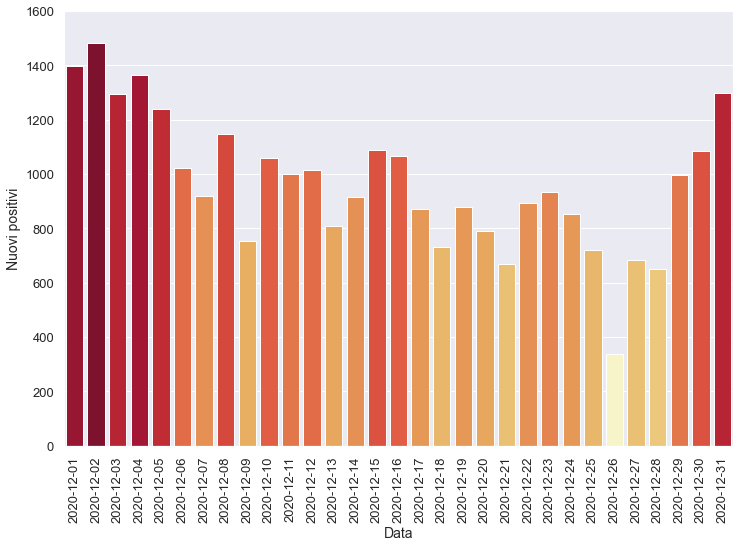

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

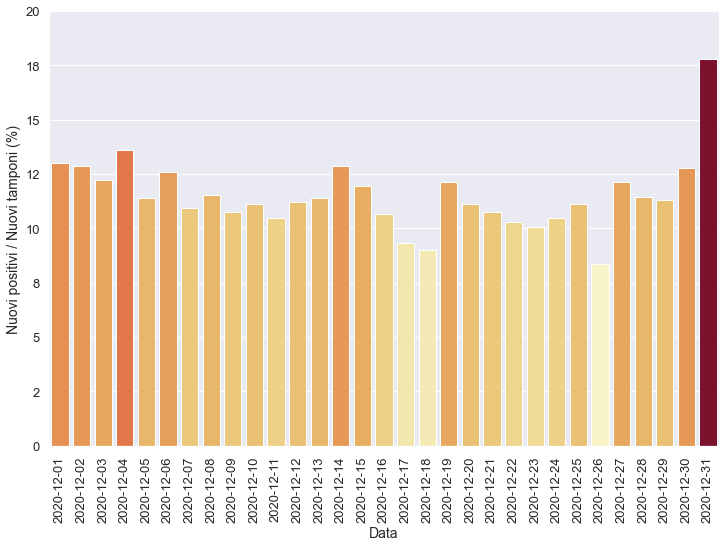

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

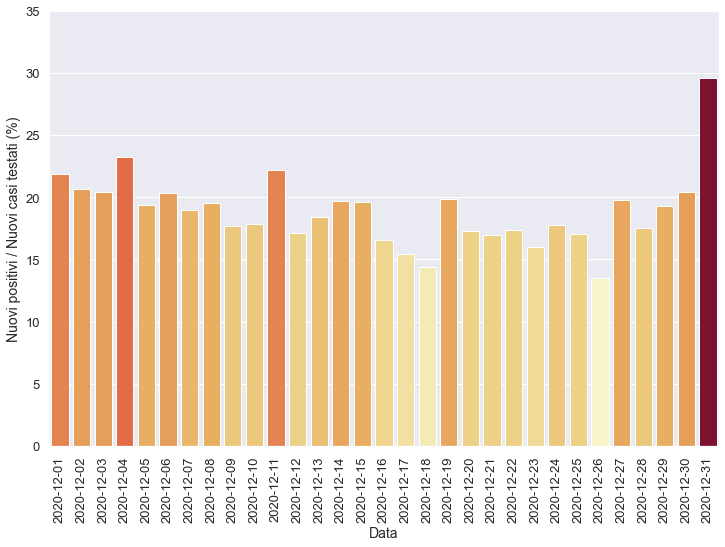

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

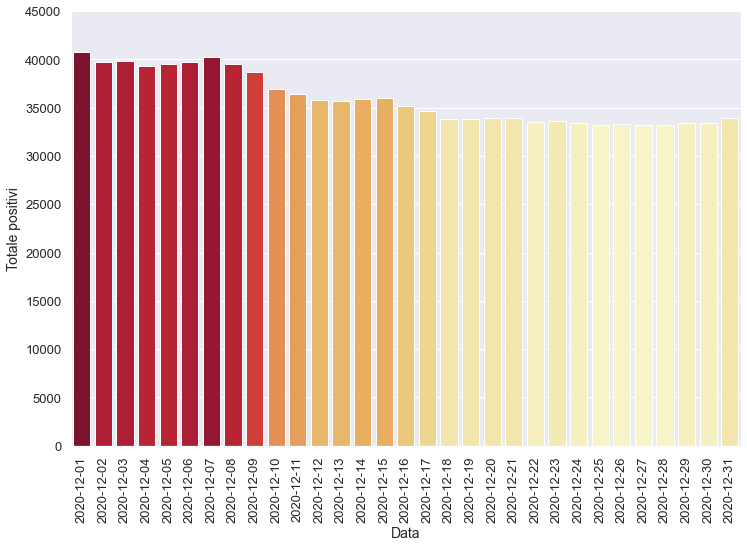

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

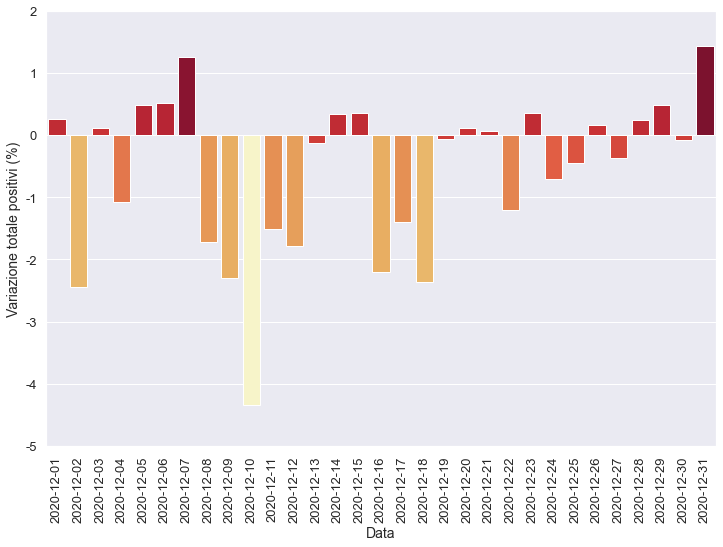

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

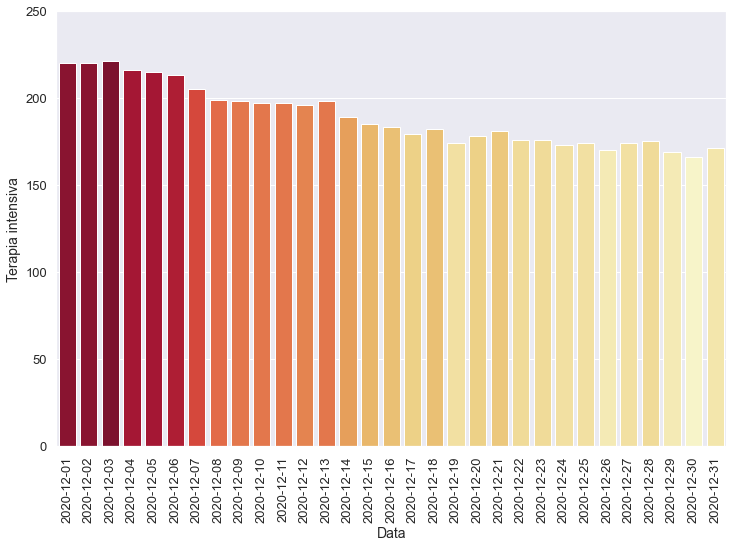

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

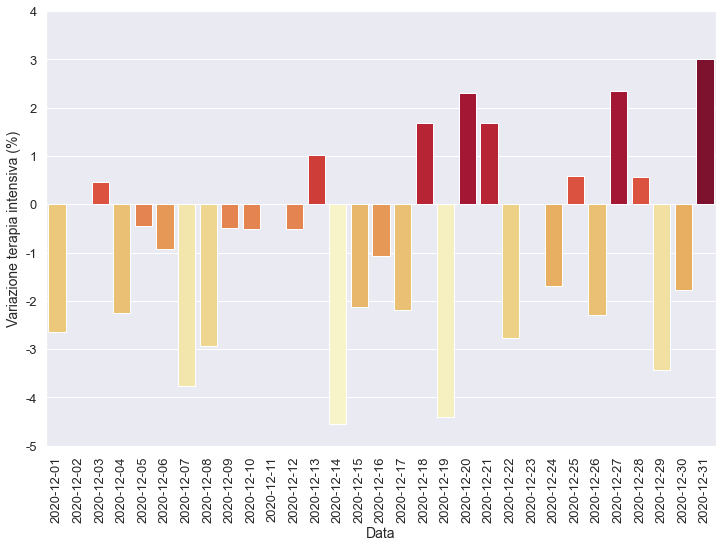

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

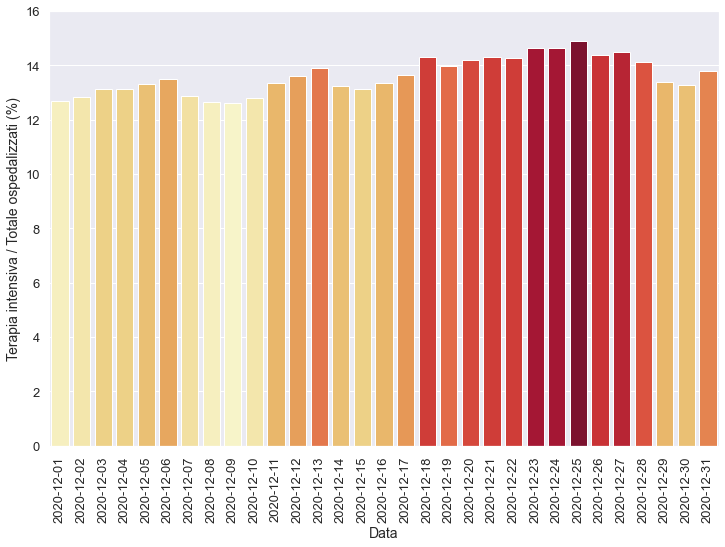

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

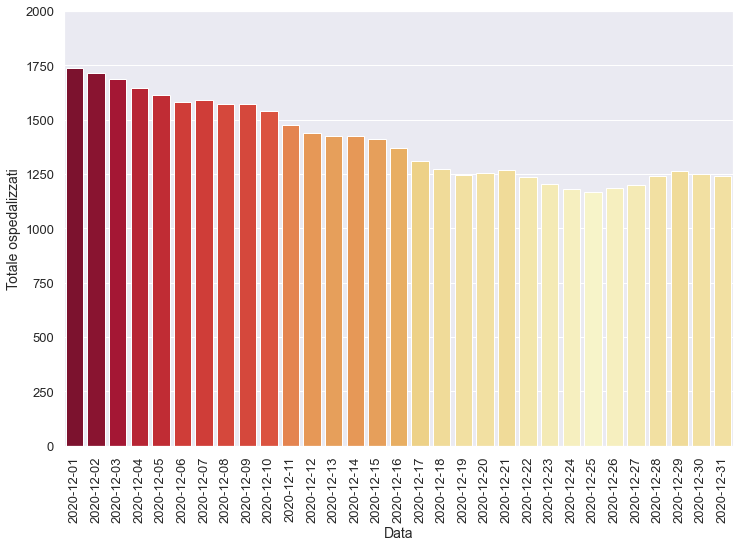

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

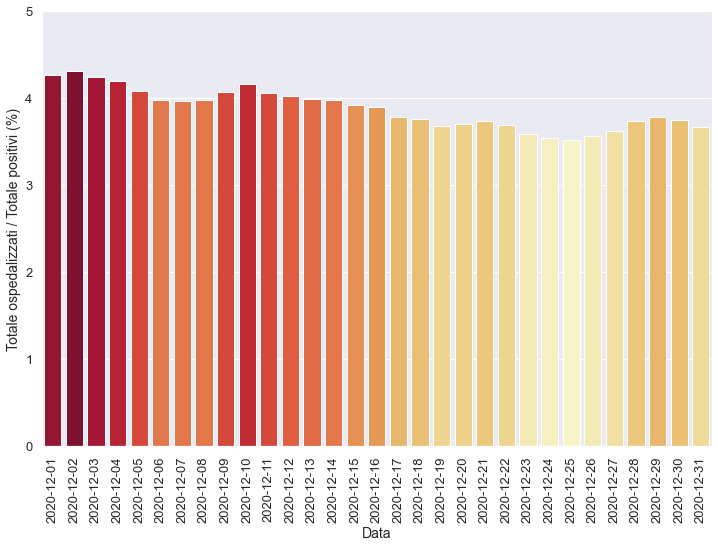

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

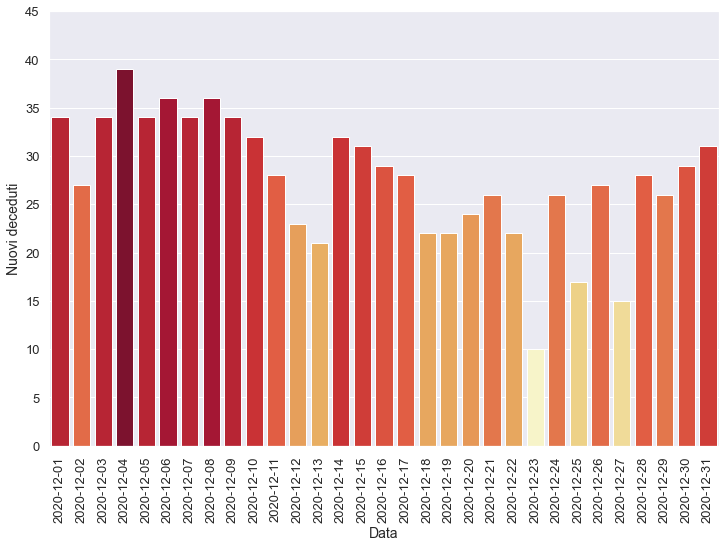

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

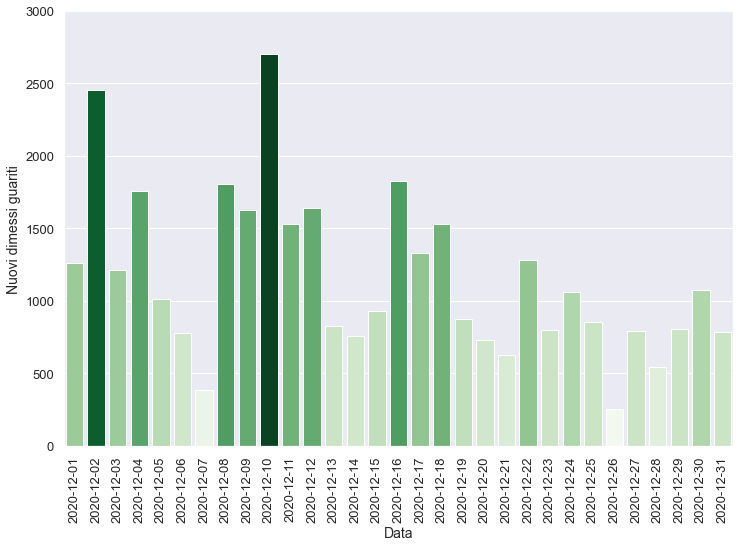

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-12-24T17:00:00,19,Sicilia,1008,173,1181,32199,33380,-234,853,...,26.0,8135.0,4808.0,-211.0,14.65,3.54,10.49,17.74,-1.70,-0.70
1,2020-12-25T17:00:00,19,Sicilia,995,174,1169,32063,33232,-148,720,...,17.0,6472.0,4215.0,-136.0,14.88,3.52,11.12,17.08,0.58,-0.44
2,2020-12-26T17:00:00,19,Sicilia,1014,170,1184,32106,33290,58,337,...,27.0,4038.0,2501.0,43.0,14.36,3.56,8.35,13.47,-2.30,0.17
3,2020-12-27T17:00:00,19,Sicilia,1027,174,1201,31966,33167,-123,682,...,15.0,5630.0,3444.0,-140.0,14.49,3.62,12.11,19.80,2.35,-0.37
4,2020-12-28T17:00:00,19,Sicilia,1064,175,1239,32007,33246,79,650,...,28.0,5693.0,3713.0,41.0,14.12,3.73,11.42,17.51,0.57,0.24
5,2020-12-29T17:00:00,19,Sicilia,1093,169,1262,32147,33409,163,995,...,26.0,8807.0,5164.0,140.0,13.39,3.78,11.30,19.27,-3.43,0.49
6,2020-12-30T17:00:00,19,Sicilia,1085,166,1251,32136,33387,-22,1084,...,29.0,8497.0,5298.0,-11.0,13.27,3.75,12.76,20.46,-1.78,-0.07
7,2020-12-31T17:00:00,19,Sicilia,1069,171,1240,32628,33868,481,1299,...,31.0,7308.0,4385.0,492.0,13.79,3.66,17.78,29.62,3.01,1.44


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

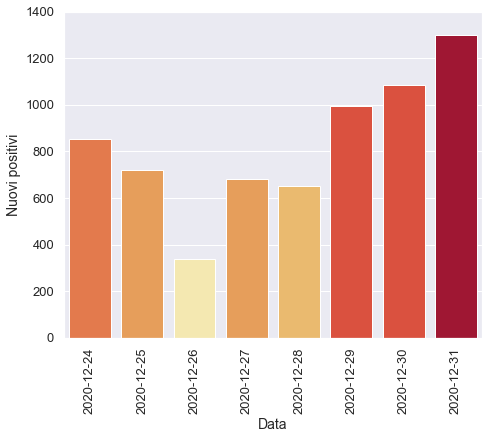

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

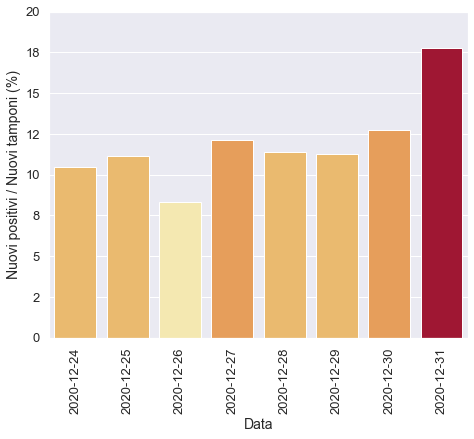

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

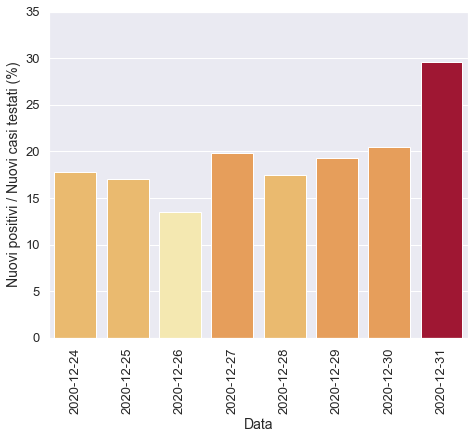

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

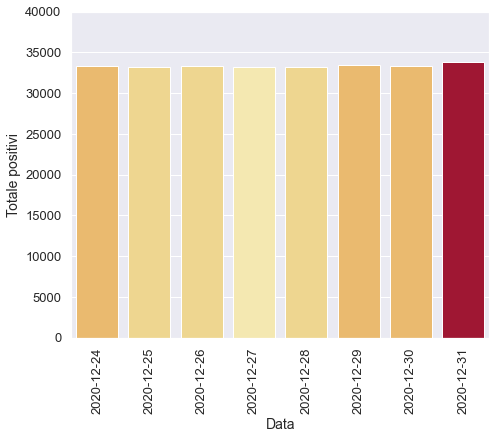

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

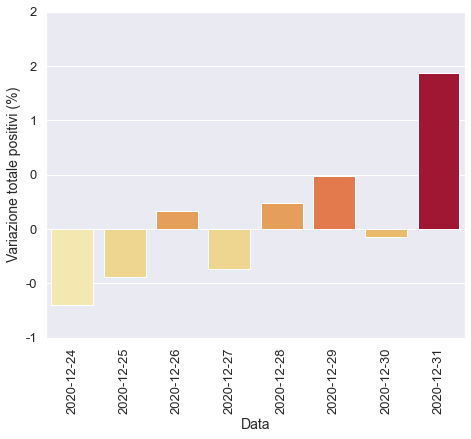

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

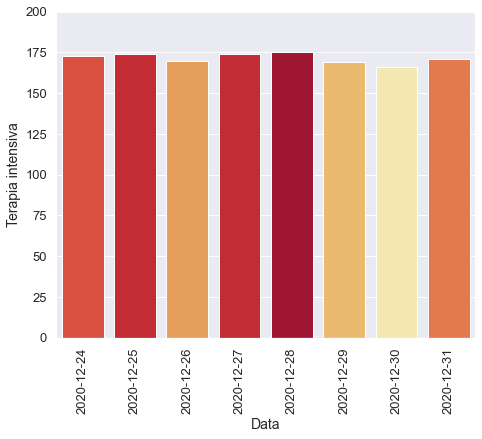

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

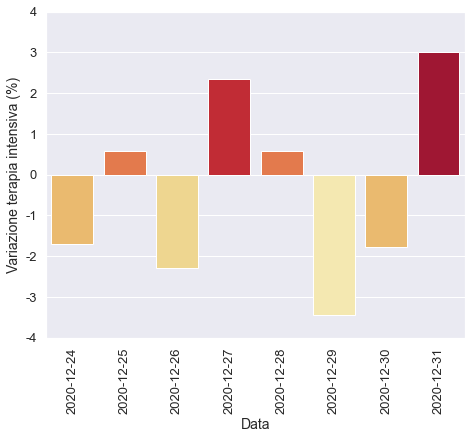

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

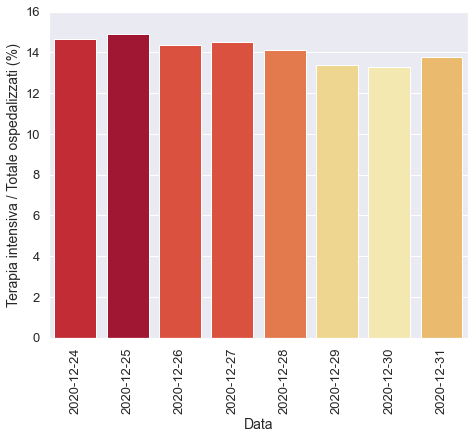

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

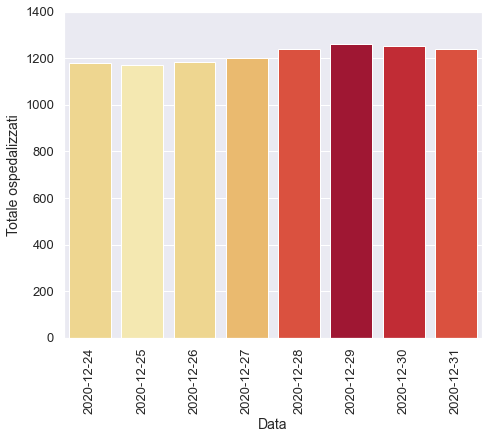

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

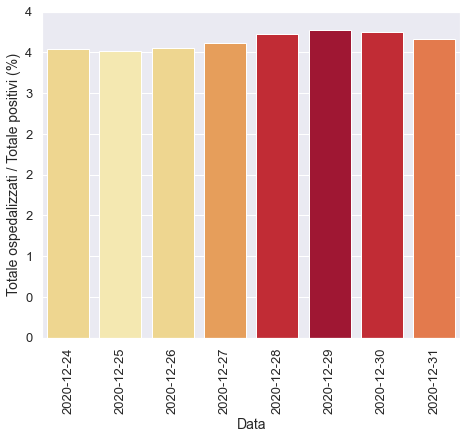

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

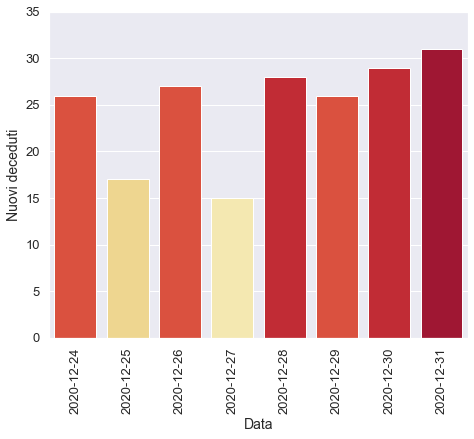

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

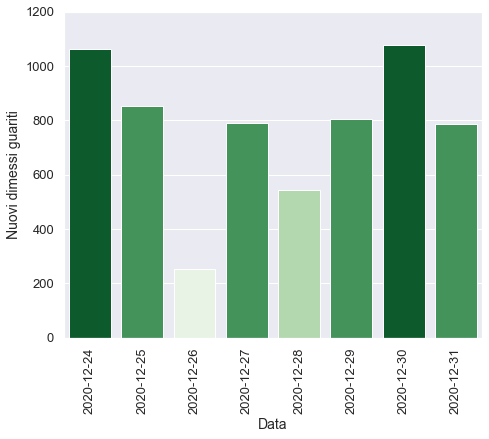

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)